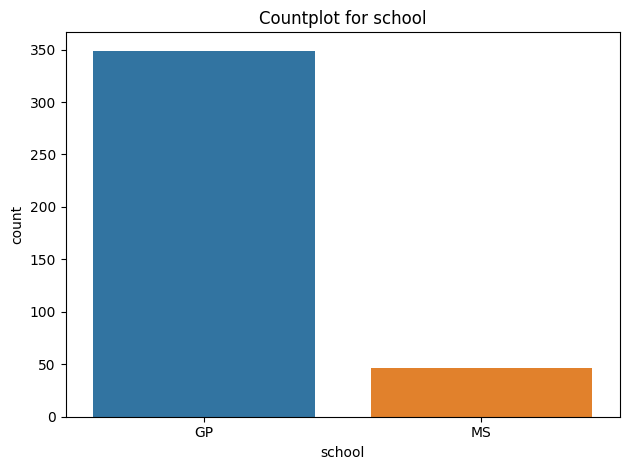

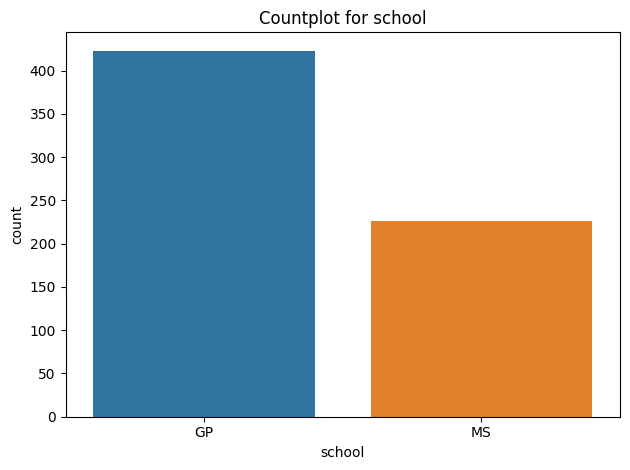

In [3]:
import mysql.connector as mc
from mysql.connector import Error as MysqlError
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from dotenv import load_dotenv

load_dotenv()

try:
    db_user = os.getenv('DB_USER') or 'root'
    db_password = os.getenv('DB_PASSWORD')
    db_port = os.getenv('DB_PORT') or '3306'
    db_database = os.getenv('DB_DATABASE')
    db_host = os.getenv('DB_HOST') or '127.0.0.1'

    cnx = mc.connect(user=db_user, password=db_password, port=db_port, database=db_database, host=db_host)
    if not cnx.is_connected():
        print('database is not connected')
        exit()
except MysqlError as me:
    print('this is mysql error:',me)
except Exception as e:
    print(e)

def create_countplot(chosen_column, table):
    try:
        global cnx
        cursor = cnx.cursor()
        query = f"""select * from {table}"""
        cursor.execute(query)

        data = cursor.fetchall()

        all_data = pd.DataFrame(data, columns=[i[0] for i in cursor.description])
        
        if chosen_column in all_data.columns:
            fig, ax = plt.subplots()
            sns.countplot(data=all_data, x=chosen_column, ax=ax)
            ax.set_title(f'Countplot for {chosen_column}')

            # Adjust layout
            plt.tight_layout()

            # Show the plot
            plt.show()
    except MysqlError as me:
        print("mysql error",me)
    except Exception as e:
        print(e)
        cnx.close()

create_countplot('school', 'math_students')
create_countplot('school', 'portuguese_students')

